# CAP 5610 - Introduction to Machine Learning <br>Florida International University - Fall 2018
## Problem Set #2
### Instructions:

Please answer the questions below. Copy this notebook and submit your answers under each problem, inserting cells as needed. You may use a combination of [python](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](http://data-blog.udacity.com/posts/2016/10/latex-primer/) to formulate your responses. Please add your initials to the file name prior to submission. For example, if your name is Juana Perez, you would use the following filename: problem_set_0_JP.ipynb. Prior to completing this assignment, you should brush up on [calculus](https://www.khanacademy.org/math/calculus-home) and [linear algebra](https://www.khanacademy.org/math/linear-algebra).

#### Problem 1 . **[15 points] Linear Regression**

Using the [diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) available through SKLearn:

a) Build a linear regression model in python, using the 2 features with the highest correlation to the output. You can read more about this dataset [here](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). Plot the MSE vs iteration number, as well as the data and final linear surface (in 3D since there are two features). Hint: in order to plot functions in 3D, use [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html).

b) Once the linear regression is complete, implement locally weighted linear regression, and train the model with the following values of $\tau: \{0.01, 0.1, 1, 10\}$. Again, plot the MSE, data, and final linear surface.


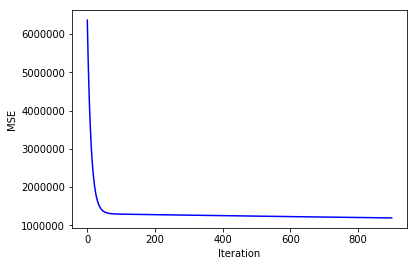

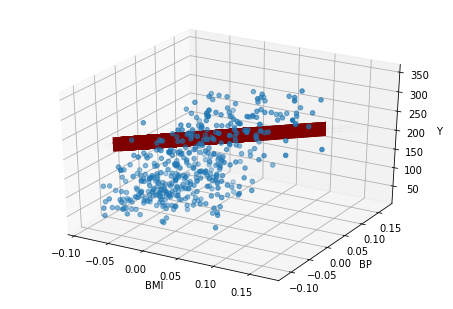

In [160]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Loading complete diabetes dataset
diabetes = datasets.load_diabetes()

#X = Features matrices , y = labels
X, y = diabetes.data, diabetes.target

#Defining Cost function
def lms_cost(h, y):
    return 0.5*np.sum((y - h)**2)

#Picking two features (BMI and BP)
X = X.take((2,3), axis=1)

def stochastic_gradient_descent(X, y, alpha=1e-4, max_iterations=900):
    
    #get input shape
    input_shape=X.shape
    
    #get number of samples
    m = input_shape[0]
    
#add constant column to X to take advantage of numpy matrix multiplication
    X = np.append(X, np.ones((X.shape[0], 1)), 1)
    
#Add rows to theta to allow matrix multiplication with X
    theta = np.ones(3)

    #Create and Initialize cost function column
    cost = []
    
#update weights iteratively until max iterations
    for i in range(max_iterations):
        h = np.dot(X, theta)
        cost.append(lms_cost(h, y))
        if i > 1 and abs(cost[i] - cost[i - 1]) < 10.0:
                break
        for i in range(m):
            theta = theta + alpha * (y[i] - h[i])*X[i]
        
#compute predictions for learned weights
    predictions = np.dot(X, theta)
    
    return theta, predictions, cost

weights, predictions, cost = stochastic_gradient_descent(X, y)

plt.plot(cost, 'b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()


# Developing final linear surface in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y)

#Relationship between BMI and its predicted value 
xx, yy = np.meshgrid(X[:,0], predictions)
z1 = np.sqrt(xx**2 + yy**2)     

#Relation between BP and its predicted value 
xx, yy = np.meshgrid(X[:,1], predictions)
z2 = np.sqrt(xx**2 + yy**2)

#Relationship between the resulting relations
z = np.sqrt(z1**2 + z2**2)
       
ax.plot_surface(X[:,0], X[:,0], z, color='red')

plt.xlabel('BMI')
plt.ylabel('BP')
ax.set_zlabel('Y')
plt.show()

Tau = 0.01


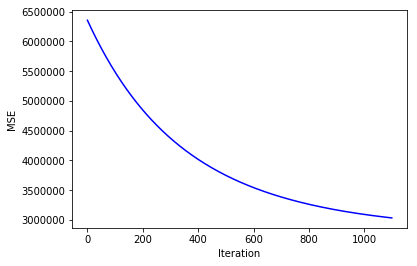

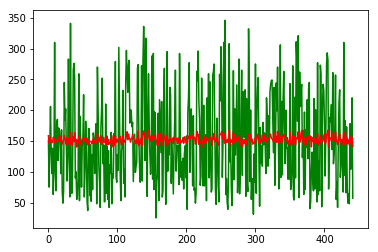

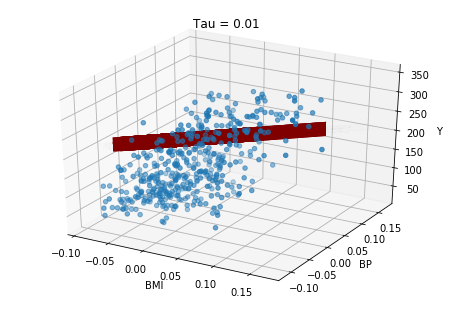

Tau = 0.1


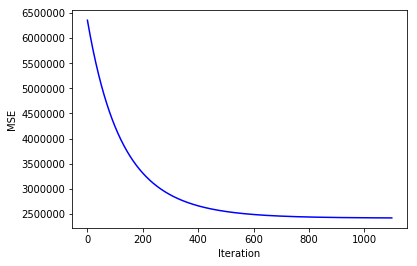

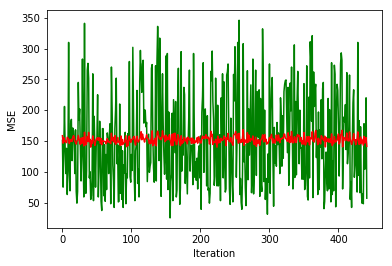

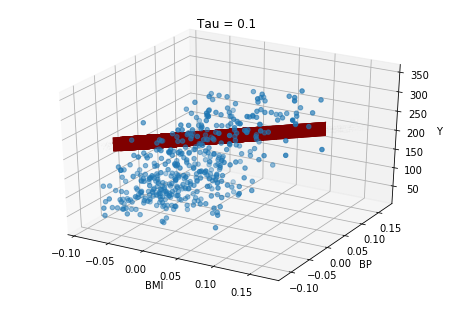

Tau = 1


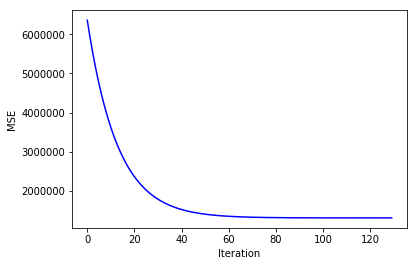

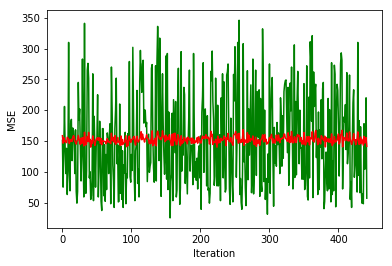

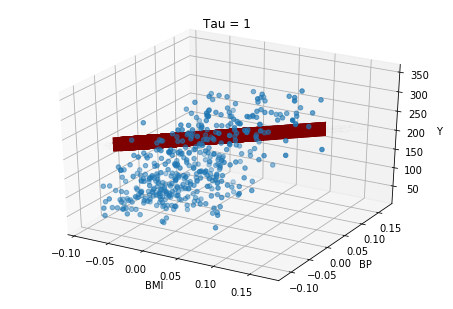

Tau = 10


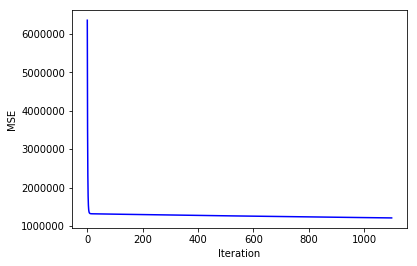

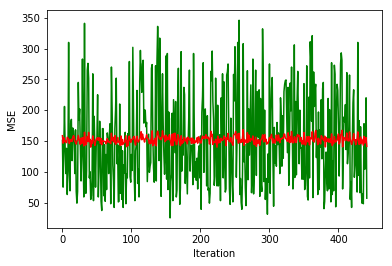

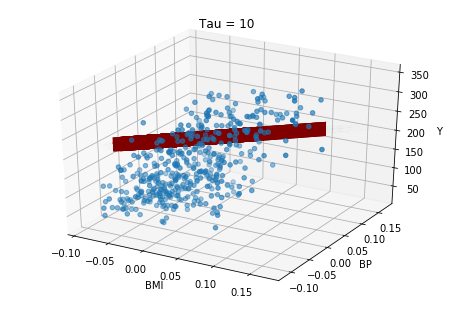

In [171]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Loading complete diabetes dataset
diabetes = datasets.load_diabetes()

#X = Features matrices , y = labels
X, y = diabetes.data, diabetes.target

#Defining Cost function
def lms_cost(h, y):
    return 0.5*np.sum((y - h)**2)

#Picking two features (BMI and BP)
X = X.take((2,3), axis=1)

#num samples
m = X.shape[0]

original_X = X

def locallyweighted(X, y, alpha, max_iterations , tau):
    
    #Add rows to theta to allow matrix multiplication with X
    theta = np.ones(3)
    
    #Create and Initialize cost function column
    cost = []
    
    X = np.append(X, np.ones((X.shape[0], 1)),1)
    w = np.matrix(np.ones((m,m)))
        
    for i in range(max_iterations):
        
        #Calculating weights 
        h = np.dot(X, theta)
        cost.append(lms_cost(h, y))
        
        if i > 1 and abs(cost[i] - cost[i - 1]) < .1:
            break
        for j in range(m):
            w[j,j] = np.exp( (np.sum(original_X - original_X[j]) ** 2) / (-2 * tau * tau))
            
        
        for i in range(m):
            
            theta = theta + alpha * w[i,i] *(y[i] - h[i]) * X[i]         
    
    #compute predictions for learned weights
    prediction = np.dot(X, theta)
    return theta, predictions, cost

weight, prediction, cost = locallyweighted(X, y, 0.003, 1100, 0.01)
weight1, prediction1, cost1 = locallyweighted(X, y, 0.003, 1100, 0.1)
weight2, prediction2, cost2 = locallyweighted(X, y, 0.003, 1100, 1)
weight3, prediction3, cost3 = locallyweighted(X, y, 0.003, 1100, 10)

print('Tau = 0.01')
plt.plot(cost, 'b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()
plt.plot(y, 'g')
plt.plot(prediction, 'r')
plt.show()

# Developing final linear surface in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y)

#Relationship between BMI and its predicted value 
xx, yy = np.meshgrid(X[:,0], prediction)
z1 = np.sqrt(xx**2 + yy**2)     

#Relation between BP and its predicted value 
xx, yy = np.meshgrid(X[:,1], prediction)
z2 = np.sqrt(xx**2 + yy**2)

#Relationship between the resulting relations
z = np.sqrt(z1**2 + z2**2)
       
ax.plot_surface(X[:,0], X[:,0], z, color='red')

plt.xlabel('BMI')
plt.ylabel('BP')
ax.set_zlabel('Y')
plt.title('Tau = 0.01')
plt.show()

print('Tau = 0.1')
plt.plot(cost1, 'b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()
plt.plot(y, 'g')
plt.plot(prediction1, 'r')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

# Developing final linear surface in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y)

#Relationship between BMI and its predicted value 
xx, yy = np.meshgrid(X[:,0], prediction1)
z1 = np.sqrt(xx**2 + yy**2)     

#Relation between BP and its predicted value 
xx, yy = np.meshgrid(X[:,1], prediction1)
z2 = np.sqrt(xx**2 + yy**2)

#Relationship between the resulting relations
z = np.sqrt(z1**2 + z2**2)
       
ax.plot_surface(X[:,0], X[:,0], z, color='red')

plt.xlabel('BMI')
plt.ylabel('BP')
ax.set_zlabel('Y')
plt.title('Tau = 0.1')
plt.show()

print('Tau = 1')
plt.plot(cost2, 'b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()
plt.plot(y, 'g')
plt.plot(prediction2, 'r')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

# Developing final linear surface in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y)

#Relationship between BMI and its predicted value 
xx, yy = np.meshgrid(X[:,0], prediction2)
z1 = np.sqrt(xx**2 + yy**2)     

#Relation between BP and its predicted value 
xx, yy = np.meshgrid(X[:,1], prediction2)
z2 = np.sqrt(xx**2 + yy**2)

#Relationship between the resulting relations
z = np.sqrt(z1**2 + z2**2)
       
ax.plot_surface(X[:,0], X[:,0], z, color='red')

plt.xlabel('BMI')
plt.ylabel('BP')
ax.set_zlabel('Y')
plt.title('Tau = 1')
plt.show()

print('Tau = 10')
plt.plot(cost3, 'b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()
plt.plot(y, 'g')
plt.plot(prediction3, 'r')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

# Developing final linear surface in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y)

#Relationship between BMI and its predicted value 
xx, yy = np.meshgrid(X[:,0], prediction3)
z1 = np.sqrt(xx**2 + yy**2)     

#Relation between BP and its predicted value 
xx, yy = np.meshgrid(X[:,1], prediction3)
z2 = np.sqrt(xx**2 + yy**2)

#Relationship between the resulting relations
z = np.sqrt(z1**2 + z2**2)
       
ax.plot_surface(X[:,0], X[:,0], z, color='red')

plt.xlabel('BMI')
plt.ylabel('BP')
ax.set_zlabel('Y')
plt.title('Tau = 10')
plt.show()

#### Problem 2 . **[15 points] Logistic Regression**

Show that for a linearly separable data set (i.e. the data can be partitioned by a linear function) the maximum likelihood solution for the logistic regression model is obtained by 1) finding a vector $\mathbf{w}$ whose decision boundary $\mathbf{w}^T\mathbf{x}=0$ separates the classes and 2) taking the magnitude of $\mathbf{w}$ to infinity.

In this problem, $\mathbf{w}$ is the weight vector and $\mathbf{x}$ is the input feature vector.

Let output target vector be $\mathbf{y}$, where $\mathbf{y} \in$ {0,1}.

If the dataset is linearly separable, then $\mathbf{w}^T\mathbf{x}$ is $\geq 0$ when $\mathbf{y}$=1 and $\mathbf{w}^T\mathbf{x}$ is $<$ 0 otherwise.....(1)

Assuming hypothesis function, ${h_w(\mathbf{x})}=g(\mathbf{w}^T\mathbf{x})$,

Therefore, the logistic or sigmoid function would be,

$${h_w(\mathbf{x})}=g(\mathbf{w}^T\mathbf{x})= \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}$$

Taking derivative of Sigmoid function,

$${h^{'}_w(\mathbf{x})}=g^{'}(\mathbf{w}^T\mathbf{x})$$
Therefore, $$ {h^{'}_w(\mathbf{x})}=g(\mathbf{w}^T\mathbf{x}){(1-g(\mathbf{w}^T\mathbf{x}))}$$

In terms of probabilistic assumptions, 

$$P{(\mathbf{y}|\mathbf{x}; \mathbf{w})} = g(\mathbf{w}^T\mathbf{x})^y{(1-g(\mathbf{w}^T\mathbf{x}))^{(1-y)}}$$

Therefore, Likelihood of parameters,

$$L(\mathbf{w})= P{(\mathbf{y}|\mathbf{x}; \mathbf{w})}$$

Assuming, 'm' to be the number of training examples generated,
$$L(\mathbf{w})=\prod_{i=1}^{m} P{(\mathbf{y^{(i)}}|\mathbf{x^{(i)}}; \mathbf{w})}$$

$$=\prod_{i=1}^{m} {\mathbf{{[h_w(\mathbf{x}}^{(i)})]^{y^{(i)}}}} {[1-\mathbf{{h_w(\mathbf{x}}^{(i)})]^{(1-y^{(i)}}}}$$

Therefore, Log of likelihood,

$$l(\mathbf{w})= \sum_{i=1}^{m}[{y^{(i)}} log h_w(\mathbf{x}^{(i)}) +{(1-y^{(i)})} log (1- h_w(\mathbf{x}^{(i)}))] $$

Differentiating log of likelihood,

$$\frac{\partial}{\partial \mathbf{w}}[l(\mathbf{w})]= [\mathbf{y}- h_w(\mathbf{x})]\mathbf{x}$$

When $\mathbf{y} = {h_w(\mathbf{x})}=\frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}} $, then ${l^{'}(\mathbf{w})= 0}$. And ${l^{'}(\mathbf{w})= 0}$ when |$\mathbf{w}$| tends to infinity. In this case, $h_w(\mathbf{x})$ would saturate or tend to 1 .....(2)

From (1) and (2), It can be inferred that the log of likelihood would give the maximum likelihood solution for sigmoid function (logistic regression model) when the vector $\mathbf{w}$ is found whose decision boundary $\mathbf{w}^T\mathbf{x}=0$ separates the classes and when |$\mathbf{w}$| tends to infinity.

#### Problem 3 . **[20 points] The exponential family**

Recall that the poisson distribution is a discrete probability distribution that can model the number of times an event occurs in a given time or space interval.

Suppose that an event can occur $1, 2, ... y$ times in an interval. The average number of events that occur in that interval are denoted $\lambda$ (not to be confused with eigen values), which is called the event rate or rate parameter. Thus, for a poisson distribution, the probability of observing $y$ events in said interval is given by

$$P(y;\lambda) = e^{-\lambda}\frac{\lambda^y}{y!}$$

With that in mind, consider the following problem. Given bicycle bridge crossing data (i.e. counts of the number of bicycles that cross a given bridge), the task is to build a model that estimates the number of bicycle crossings in a day given the High Temp (°F), the Low Temp (°F) and the Precipitation for that day.


a) Is the poisson distribution in the exponential family? If so, construct a GLM to solve this problem.

The standard exponential distribution probability is written as,
$$P(y;\eta) = b(y) e^{[\eta^T T(y)- a(\eta)]}$$

Comparing given poisson distribution with the standard exponential distribution, the poisson distribution can be re-written as,

$$P(y;\lambda) = \frac{e^{-\lambda}e^{ylog\lambda}}{y!}$$

Therefore, $$P(y;\lambda) = \frac{1}{y!}e^{(ylog\lambda-\lambda)}....(3)$$

To verify the above constructed GLM, the assumptions of GLM construction are applied on (3) as listed below,

i) Given an interval and $\lambda$, the distribution of y follows exponential family distribution with parameter log$\lambda$.
This satisfies assumption 1 of GLM construction.

ii) For a given interval, the expected value of T(y) is y. This satisfies assumption 2 of GLM construction.

iii) The natural paramter $\eta$ and input interval are linearly related since $\eta = log\lambda$. Since $\lambda \in \mathbb{R}^{+}$, hence $\eta$ is a function from $\mathbb{R}^+\rightarrow \mathbb{R}$ in the given problem, the assumption 3 of GLM construction is satisfied.



b) What are the natural parameter of the distribution, the sufficient statistic, the log partition function, and $b(y)$.

From (3), it can be determined that,

The natural parameter is,

$$\eta = log\lambda$$

The sufficient statistic is, 

$$T(y) = y$$

The log partition function is,

$$a(\eta) = e^{\eta}$$

and $b(y)$ is,

$$b(y)=\frac{1}{y!}$$

c) What is the canonical response function for this problem?

The canonical response function would be represented as,

$$g(\eta)= E[T(y);\eta]$$
As the 'average' number of events that occur in an interval = $\lambda$, therefore
$$g(\eta)=\lambda$$

Since $\eta = log\lambda$, this can also be written as,
$$g(\eta)=e^{\eta}$$


d) Update the course repo or download the dataset [directly](https://github.com/drmaj/CAP5610/tree/master/Datasets) and develop a GLM based on the poisson distribution in python using the NYC Bicycle Crossing Dataset. Create a model for each bridge, and a model for the total.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [32]:
# Importing NYC Bicycle Crossing dataset (Please change the location as per your system)
data_NYC = pd.read_csv('C:\\Users\\Asadullah\\Desktop\\FIU\\Courses\\CAP5610- Machine Learning\\nyc-east-river-bicycle-counts.csv')
data_NYC

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
5,5,2016-04-06 00:00:00,2016-04-06 00:00:00,45.0,30.0,0,1885.0,3329,3856.0,2849.0,11919
6,6,2016-04-07 00:00:00,2016-04-07 00:00:00,57.0,53.1,0.09,1276.0,2581,3282.0,2457.0,9596
7,7,2016-04-08 00:00:00,2016-04-08 00:00:00,46.9,44.1,0.01,1982.0,3455,4113.0,3194.0,12744
8,8,2016-04-09 00:00:00,2016-04-09 00:00:00,43.0,37.9,0.09,504.0,997,1507.0,1502.0,4510
9,9,2016-04-10 00:00:00,2016-04-10 00:00:00,48.9,30.9,0,1447.0,2387,3132.0,2160.0,9126


Text(0.5,1,'Model for Brooklyn Bridge')

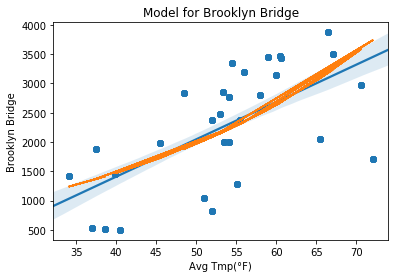

In [80]:
# Loading data into variable
Y_0 = data_NYC['Brooklyn Bridge']
X_0 = data_NYC['Low Temp (°F)']
# Averaging the high temp and low temp matrices row-by-row
data_NYC['Avg Tmp(°F)'] = (data_NYC['High Temp (°F)'] + data_NYC['Low Temp (°F)'])/2
# Adding intercept ( Avg Tmp(°F) to input variable
P_0 = data_NYC['Avg Tmp(°F)']
P_0 = sm.add_constant(P_0)
# Constructing Poisson regression model into GLM 
model = sm.GLM(Y_0,P_0, family=sm.families.Poisson()).fit()
# Creating dataframe column for fitted values for Poisson distribution, after training the data
data_NYC['reg_fit'] = model.fittedvalues
# Plotting regression line and performing linear regression to plot trained data alongside
sns.regplot(data_NYC['Avg Tmp(°F)'], data_NYC['Brooklyn Bridge'], fit_reg=True)
# Plotting data points
plt.plot(data_NYC['Avg Tmp(°F)'], data_NYC['reg_fit']);
plt.title('Model for Brooklyn Bridge')

Text(0.5,1,'Model for Manhattan Bridge')

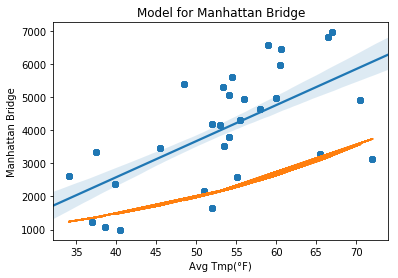

In [77]:
# Loading data into variable
Y_1 = data_NYC['Manhattan Bridge']
X_1 = data_NYC['Low Temp (°F)']
# Averaging the high temp and low temp matrices row-by-row
data_NYC['Avg Tmp(°F)'] = (data_NYC['High Temp (°F)'] + data_NYC['Low Temp (°F)'])/2
# Adding intercept ( Avg Tmp(°F) to input variable
P_1 = data_NYC['Avg Tmp(°F)']
P_1 = sm.add_constant(P_1)
# Constructing Poisson regression model into GLM 
model = sm.GLM(Y_1,P_1, family=sm.families.Poisson()).fit()
# Creating dataframe column for fitted values for Poisson distribution, after training the data
data_NYC['reg_fit'] = model.fittedvalues
# Plotting regression line and performing linear regression to plot trained data alongside
sns.regplot(data_NYC['Avg Tmp(°F)'], data_NYC['Manhattan Bridge'], fit_reg=True)
# Plotting data points
plt.plot(data_NYC['Avg Tmp(°F)'], data_NYC['reg_fit']);
plt.title('Model for Manhattan Bridge')

Text(0.5,1,'Model for Williamsburg Bridge')

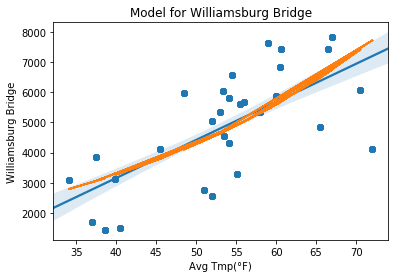

In [89]:
# Loading data into variable
Y_2 = data_NYC['Williamsburg Bridge']
X_2 = data_NYC['Low Temp (°F)']
# Averaging the high temp and low temp matrices row-by-row
data_NYC['Avg Tmp(°F)'] = (data_NYC['High Temp (°F)'] + data_NYC['Low Temp (°F)'])/2
# Adding intercept (Avg Tmp(°F)) to input variable
P_2 = data_NYC['Avg Tmp(°F)']
P_2 = sm.add_constant(P_2)
# Constructing Poisson regression model into GLM 
model = sm.GLM(Y_2,P_2, family=sm.families.Poisson()).fit()
# Creating dataframe column for fitted values for Poisson distribution, after training the data
data_NYC['reg_fit'] = model.fittedvalues
# Plotting regression line and performing linear regression to plot trained data alongside
sns.regplot(data_NYC['Avg Tmp(°F)'], data_NYC['Williamsburg Bridge'], fit_reg=True)
# Plotting data points
plt.plot(data_NYC['Avg Tmp(°F)'], data_NYC['reg_fit']);
plt.title('Model for Williamsburg Bridge')

Text(0.5,1,'Model for Queensboro Bridge')

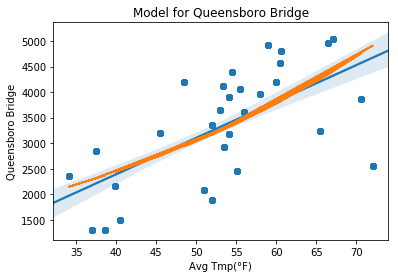

In [90]:
# Loading data into variable
Y_3 = data_NYC['Queensboro Bridge']
X_3 = data_NYC['Low Temp (°F)']
# Averaging the high temp and low temp matrices row-by-row
data_NYC['Avg Tmp(°F)'] = (data_NYC['High Temp (°F)'] + data_NYC['Low Temp (°F)'])/2
# Adding intercept (Avg Tmp(°F)) to input variable
P_3 = data_NYC['Avg Tmp(°F)']
P_3 = sm.add_constant(P_3)
# Constructing Poisson regression model into GLM 
model = sm.GLM(Y_3,P_3, family=sm.families.Poisson()).fit()
# Creating dataframe column for fitted values for Poisson distribution, after training the data
data_NYC['reg_fit'] = model.fittedvalues
# Plotting regression line and performing linear regression to plot trained data alongside
sns.regplot(data_NYC['Avg Tmp(°F)'], data_NYC['Queensboro Bridge'], fit_reg=True)
# Plotting data points
plt.plot(data_NYC['Avg Tmp(°F)'], data_NYC['reg_fit']);
plt.title('Model for Queensboro Bridge')

Text(0.5,1,'Model for Total')

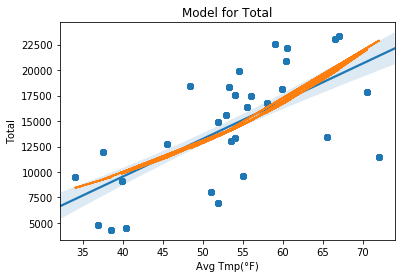

In [91]:
# Loading data into variable
Y_4 = data_NYC['Total']
X_4 = data_NYC['Low Temp (°F)']
# Averaging the high temp and low temp matrices row-by-row
data_NYC['Avg Tmp(°F)'] = (data_NYC['High Temp (°F)'] + data_NYC['Low Temp (°F)'])/2
# Adding intercept (Avg Tmp(°F)) to input variable
P_4 = data_NYC['Avg Tmp(°F)']
P_4 = sm.add_constant(P_4)
# Constructing Poisson regression model into GLM 
model = sm.GLM(Y_4,P_4, family=sm.families.Poisson()).fit()
# Creating dataframe column for fitted values for Poisson distribution, after training the data
data_NYC['reg_fit'] = model.fittedvalues
# Plotting regression line and performing linear regression to plot trained data alongside
sns.regplot(data_NYC['Avg Tmp(°F)'], data_NYC['Total'], fit_reg=True)
# Plotting data points
plt.plot(data_NYC['Avg Tmp(°F)'], data_NYC['reg_fit']);
plt.title('Model for Total')